# 전이학습(Transfer Learning)
 - imagenet 데이터로 학습한 VGG16을 사용

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

np.random.seed(3)
tf.compat.v1.set_random_seed(3)

In [7]:
# !unzip colab_train_test.zip

## 1. 데이터 준비


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
       'train',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       'test',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


## 2. 모델 생성
 * VGG16
    - include_top : VGG16의 마지막 층(분류 담당하는 곳)을 불러올지 여부
    - transfer_model.trainable = False: 추가 학습 진행하지 않음

 * 신규 모델

In [5]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

## 3. 모델 컴파일

In [8]:
finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

## 4. 모델 학습

In [10]:
history = finetune_model.fit(
       train_generator,
    #    steps_per_epoch=100,
       epochs=20,
       validation_data=test_generator,
       validation_steps=4)


Epoch 1/20
32/32 [==============================] - 39s 1s/step - loss: 0.2848 - accuracy: 0.8938 - val_loss: 0.3487 - val_accuracy: 0.8000
Epoch 2/20
32/32 [==============================] - 39s 1s/step - loss: 0.1971 - accuracy: 0.9563 - val_loss: 0.2406 - val_accuracy: 0.9500
Epoch 3/20
32/32 [==============================] - 39s 1s/step - loss: 0.1822 - accuracy: 0.9625 - val_loss: 0.2507 - val_accuracy: 0.8500
Epoch 4/20
32/32 [==============================] - 39s 1s/step - loss: 0.1555 - accuracy: 0.9500 - val_loss: 0.0836 - val_accuracy: 1.0000
Epoch 5/20
32/32 [==============================] - 39s 1s/step - loss: 0.1465 - accuracy: 0.9563 - val_loss: 0.1082 - val_accuracy: 0.9500
Epoch 6/20
32/32 [==============================] - 39s 1s/step - loss: 0.1233 - accuracy: 0.9750 - val_loss: 0.1473 - val_accuracy: 0.9500
Epoch 7/20
32/32 [==============================] - 39s 1s/step - loss: 0.1394 - accuracy: 0.9438 - val_loss: 0.2864 - val_accuracy: 0.9000
Epoch 8/20
32/32 [==

KeyboardInterrupt: ignored

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
 32/100 [========>.....................] - 39s 1s/step - loss: 0.5414 - accuracy: 0.7625 - val_loss: 0.3507 - val_accuracy: 0.9000


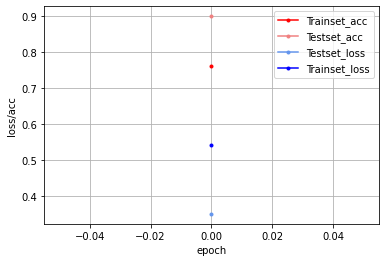

In [6]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()